# Runmageddon Kraków analysis

In this project, I want to analyse data from [Runmageddon](https://wyniki.b4sport.pl/runmageddon-rekrut-krakow/e4966.html?language=en) - a running competition being held in various cities in Poland. This is the first stage of this project where I'll look into individual competition taking place in Kraków but I'd like to also attempt merging data from all historical competitions (we'll see how it goes! Fingers crossed). 

This project is part of my Data Analytics portfolio so I'm trying to be descriptive about every step of the way and show my thought process. If you're just interested in the results, feel free to skip irrelevant parts.

**Why this dataset?**

Runmageddon publishes every result from their competitions since 2018 online. With just a bit of scraping, it's very easy to read the data so I thought it could be a good challenge for an entry-level data analysis project.

**What is Runmageddon?**

As per their website: 'Runmageddon is the largest obstacle course in Poland with a difficulty level adapted to the capabilities of every daredevil.' Which pretty much sums up what we'll be looking at. The dataset might seem strange to analyse at times since the courses are not customised for competitiveness only, but also for people who want to spend a fun activity time. I still think there are a lot of interesting insights we can pull from the data so why not give it a try?!

**This data contains the following features:**
- *Place*: Place in the race
- *Participant*: Name of each participant
- *Number*: ID number of participants
- *Club*: Name of the club they run under
- *City*: Participant's city
- *NAT*: Participant's Nationality
- *Category*: Category they chose to participate in
- *MCat*: Place in the race within this category
- *F/M*: Gender (K - Female {'Kobieta' in Polish, hence 'K'}, M - Male) + place in the race within gender
- *Seria*: series, specifies the time participants chose to start from
- *Start time*: Delay in starting the race
- *Net time 6km*: time to finish the race excluding start time
- *Clock time 6km*: time to finish the race
- *Różnica w czasie*: Time difference against the fastest runner
- *Pace min/km*
- *Pace km/h*

Let's get to it!

---

## Import Libraries
I'll import a few key libraries but I might need more as I go along

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remove the below if you want to see warnings
import warnings
warnings.filterwarnings('ignore')

## Get the data
Now, I want to scrape the table from Runmageddon's website. Since the data is already in a table format, I don't need to use the `beautiful soup` library for this. Instead, I can use the `pd.read_html()` formula.

In [2]:
# Save the link in a variable
url = 'https://wyniki.b4sport.pl/runmageddon-rekrut-krakow/e4966.html?language=en'
# load the link using pandas
tables = pd.read_html(url)

Perfect! Let's check how many tables did we import from the website in case there is more than one.

In [3]:
# show number of tables loaded
len(tables)

4

---

Indeed, there are 4 tables loaded. Let's check which one is the main table
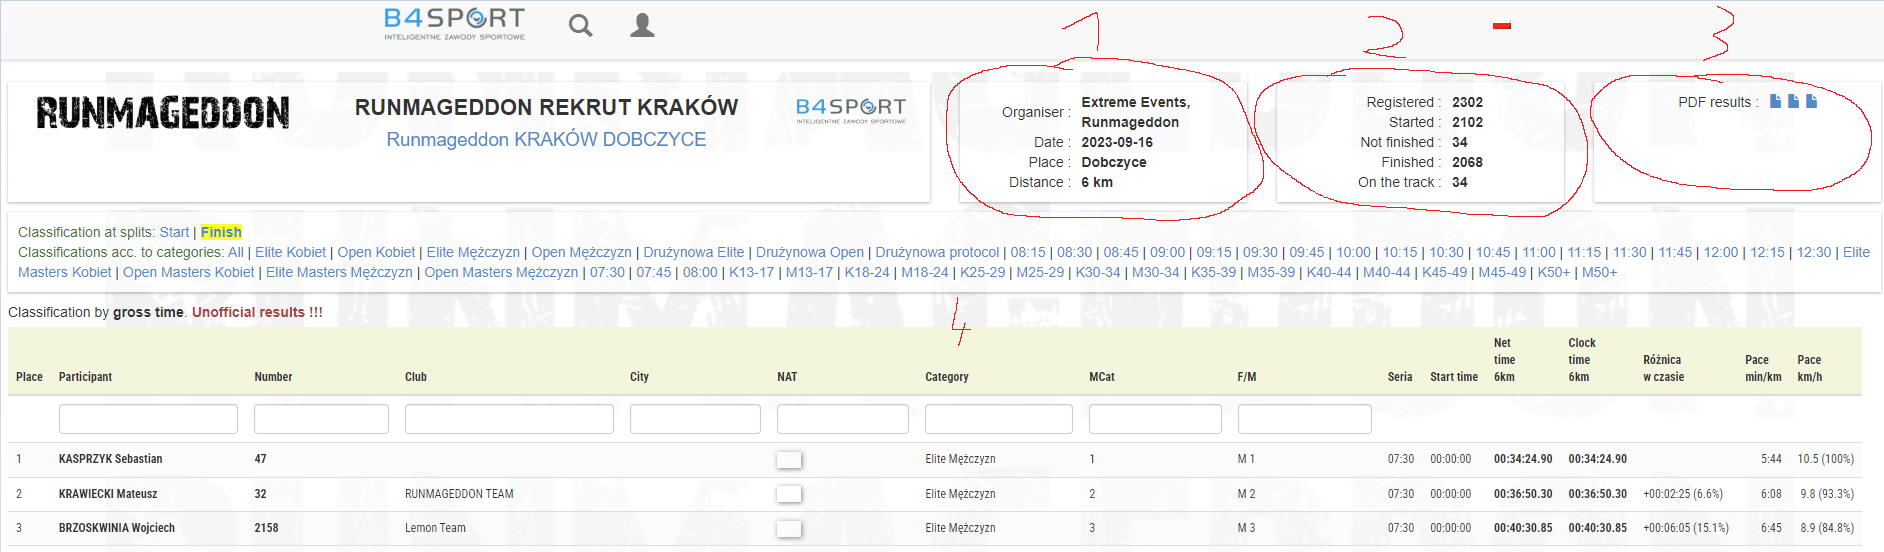

In [4]:
# show me the first 5 rows of the 1st table
tables[0].head()

,0,1
0,Organiser :,"Extreme Events, Runmageddon"
1,Date :,2023-09-16
2,Place :,Dobczyce
3,Distance :,6 km


In [5]:
# show me the first 5 rows of the 2nd table
tables[1].head()

,0,1
0,Registered :,2302
1,Started :,2102
2,Not finished :,34
3,Finished :,2068
4,On the track :,34


In [6]:
# show me the first 5 rows of the 3rd table
tables[2].head()

,Unnamed: 0,Unnamed: 1
0,PDF results :,NaN


In [7]:
# show me the first 5 rows of the 4th table
tables[3].head()

,Place,Participant,Number,Club,City,NAT,Category,MCat,F/M,Seria,Start time,Net time 6km,Clock time 6km,Różnica w czasie,Pace min/km,Pace km/h
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,KASPRZYK Sebastian,47,NaN,NaN,NaN,Elite Mężczyzn,1,M 1,07:30,00:00:00,00:34:24.90,00:34:24.90,NaN,5:44,10.5 (100%)
2,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,NaN,NaN,Elite Mężczyzn,2,M 2,07:30,00:00:00,00:36:50.30,00:36:50.30,+00:02:25 (6.6%),6:08,9.8 (93.3%)
3,3,BRZOSKWINIA Wojciech,2158,Lemon Team,NaN,NaN,Elite Mężczyzn,3,M 3,07:30,00:00:00,00:40:30.85,00:40:30.85,+00:06:05 (15.1%),6:45,8.9 (84.8%)
4,4,CICHOŃ Adam,26,Lemon Team,NaN,NaN,Elite Mężczyzn,4,M 4,07:30,00:00:00,00:41:48.20,00:41:48.20,+00:07:23 (17.7%),6:58,8.6 (81.9%)


---

Clearly, it's the last one so I can just load this table.

In [8]:
df = tables[3]
df

,Place,Participant,Number,Club,City,NAT,Category,MCat,F/M,Seria,Start time,Net time 6km,Clock time 6km,Różnica w czasie,Pace min/km,Pace km/h
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,KASPRZYK Sebastian,47,NaN,NaN,NaN,Elite Mężczyzn,1,M 1,07:30,00:00:00,00:34:24.90,00:34:24.90,NaN,5:44,10.5 (100%)
2,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,NaN,NaN,Elite Mężczyzn,2,M 2,07:30,00:00:00,00:36:50.30,00:36:50.30,+00:02:25 (6.6%),6:08,9.8 (93.3%)
3,3,BRZOSKWINIA Wojciech,2158,Lemon Team,NaN,NaN,Elite Mężczyzn,3,M 3,07:30,00:00:00,00:40:30.85,00:40:30.85,+00:06:05 (15.1%),6:45,8.9 (84.8%)
4,4,CICHOŃ Adam,26,Lemon Team,NaN,NaN,Elite Mężczyzn,4,M 4,07:30,00:00:00,00:41:48.20,00:41:48.20,+00:07:23 (17.7%),6:58,8.6 (81.9%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,2098,WŁODARCZYK Kinga,1446,NaN,NaN,NaN,Open Kobiet,564,K 659,10:45,00:00:00,NaN,NaN,NaN,NaN,(0.0%)
2100,2099,SIEDLIK Mateusz,1429,NaN,NaN,NaN,Open Mężczyzn,1177,M 1437,10:45,00:00:00,NaN,NaN,NaN,NaN,(0.0%)
2101,2100,WŁODARCZYK Piotr,1447,NaN,NaN,NaN,Open Mężczyzn,1178,M 1438,10:45,00:00:00,NaN,NaN,NaN,NaN,(0.0%)
2102,2101,WIŚNIEWSKI Arkadiusz,1859,Warriors Łódź,NaN,NaN,Open Mężczyzn,1179,M 1439,12:00,00:00:00,NaN,NaN,NaN,NaN,(0.0%)


---
## Data Exploration and Cleaning

The data loaded correctly so let's get into the exploration and cleaning phase.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Place             2103 non-null   object
 1   Participant       2100 non-null   object
 2   Number            2103 non-null   object
 3   Club              1015 non-null   object
 4   City              1 non-null      object
 5   NAT               1 non-null      object
 6   Category          2100 non-null   object
 7   MCat              2100 non-null   object
 8   F/M               2103 non-null   object
 9   Seria             2101 non-null   object
 10  Start time        2103 non-null   object
 11  Net time 6km      2069 non-null   object
 12  Clock time 6km    2069 non-null   object
 13  Różnica w czasie  2068 non-null   object
 14  Pace min/km       2069 non-null   object
 15  Pace km/h         2103 non-null   object
dtypes: object(16)
memory usage: 263.1+ KB


---

Some interesting insights here. 
1. There are 2104 rows but going back to table 2 from the website, there were 2102 people who started the race so we've got 2 extra rows in the dataset
2. Some columns show 2103 non-null rows which indicates that there's one empty row and one extra
3. `City` and `Nat` columns have no data in them so they can be removed
4. There are columns with blank values that shouldn't be blank `(Participant, Category, Mcat and Seria)`
5. Columns like `Club` and those related to time have blank rows but this makes sense. First, not everyone has to be a member of a club to participate. Second, not everyone has finished the race so some of the time columns will remain empty

Taking this information into account, let's start exploring further. First, I wanna look at the empty rows.

In [10]:
# identify NaN rows in either of these columns: Participant, Category, Mcat and Seria
df[df['Participant'].isna() | df['Category'].isna() | df['Seria'].isna() | df['MCat'].isna()]

,Place,Participant,Number,Club,City,NAT,Category,MCat,F/M,Seria,Start time,Net time 6km,Clock time 6km,Różnica w czasie,Pace min/km,Pace km/h
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,681,NaN,235,NaN,NaN,NaN,Open Mężczyzn,441,M 577,08:15,00:00:00,01:35:18.40,01:35:18.40,+01:00:53 (63.9%),15:53,3.8 (36.2%)
936,936,NaN,2233,NaN,NaN,NaN,NaN,NaN,1,NaN,00:00:00,01:43:57.90,01:43:57.90,+01:09:33 (66.9%),17:19,3.5 (33.3%)
1285,1285,NaN,2235,NaN,NaN,NaN,NaN,NaN,2,NaN,00:00:00,01:55:59.75,01:55:59.75,+01:21:34 (70.3%),19:19,3.1 (29.5%)
1533,1533,MANDRELA Paweł,2229,Mamezi Team,NaN,NaN,NaN,NaN,3,11:45,00:00:00,02:03:49.40,02:03:49.40,+01:29:24 (72.2%),20:38,2.9 (27.6%)


---

It looks like there's one extra row on the top that should be removed but other than that, there seem to be 4 records with missing data. In theory, I could leave them as most of the relevant information I'll be analysing later is there but just for the sake of simplicity, let's drop the rows 936, 1285 and 1533 from the dataframe as they have confusing Gender records.

In [11]:
# drop the rows from the dataset
df = df.drop(index=tables[3].index[[0, 936, 1285, 1533]], axis=0).reset_index(drop=True)
# check if the rows were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Place             2100 non-null   object
 1   Participant       2099 non-null   object
 2   Number            2100 non-null   object
 3   Club              1014 non-null   object
 4   City              1 non-null      object
 5   NAT               1 non-null      object
 6   Category          2100 non-null   object
 7   MCat              2100 non-null   object
 8   F/M               2100 non-null   object
 9   Seria             2100 non-null   object
 10  Start time        2100 non-null   object
 11  Net time 6km      2066 non-null   object
 12  Clock time 6km    2066 non-null   object
 13  Różnica w czasie  2065 non-null   object
 14  Pace min/km       2066 non-null   object
 15  Pace km/h         2100 non-null   object
dtypes: object(16)
memory usage: 262.6+ KB


---

Now, there's still one extra row I need to identify so let's continue the exploration part

In [12]:
df.describe()

,Place,Participant,Number,Club,City,NAT,Category,MCat,F/M,Seria,Start time,Net time 6km,Clock time 6km,Różnica w czasie,Pace min/km,Pace km/h
count,2100,2099,2100,1014,1,1,2100,2100,2100,2100,2100,2066,2066,2065,2066,2100
unique,2040,2089,2100,285,1,1,8,1171,2072,22,2,2006,2006,1489,744,67
top,777,POLASZ Anna,47,IFITTTEAM,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Open Mężczyzn,1,M 659,10:30,00:00:00,01:38:28.10,01:38:28.10,+01:32:01 (72.8%),20:25,2.9 (27.6%)
freq,2,2,1,21,1,1,1179,7,2,142,2099,2,2,7,15,141


---

There it is. The only row within `City` and `Nat` does not belong there. Translating into English, it says "Time limit exceeded: 02:30:00"

In [13]:
# look at the suspicious row
df[df['City'] == 'Przekroczony limit czasu: 02:30:00']

,Place,Participant,Number,Club,City,NAT,Category,MCat,F/M,Seria,Start time,Net time 6km,Clock time 6km,Różnica w czasie,Pace min/km,Pace km/h
1966,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00,Przekroczony limit czasu: 02:30:00


---

On the website, we can see that this row is part of a break to divide people who took too long to finish the race.

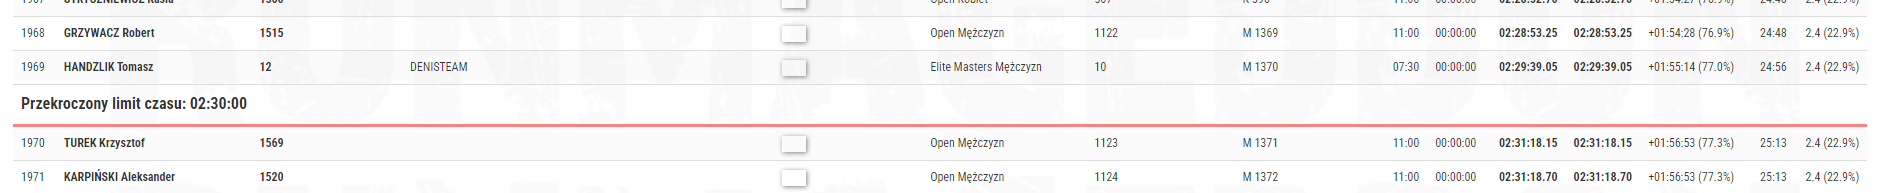

Let's get rid of it and double-check if it's still there.

In [14]:
df = df.drop(index=df.index[[1966]], axis=0).reset_index(drop=True)

In [15]:
df[df['City'] == 'Przekroczony limit czasu: 02:30:00']

,Place,Participant,Number,Club,City,NAT,Category,MCat,F/M,Seria,Start time,Net time 6km,Clock time 6km,Różnica w czasie,Pace min/km,Pace km/h


In [16]:
df.info()
print("\n\n\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Place             2099 non-null   object
 1   Participant       2098 non-null   object
 2   Number            2099 non-null   object
 3   Club              1013 non-null   object
 4   City              0 non-null      object
 5   NAT               0 non-null      object
 6   Category          2099 non-null   object
 7   MCat              2099 non-null   object
 8   F/M               2099 non-null   object
 9   Seria             2099 non-null   object
 10  Start time        2099 non-null   object
 11  Net time 6km      2065 non-null   object
 12  Clock time 6km    2065 non-null   object
 13  Różnica w czasie  2064 non-null   object
 14  Pace min/km       2065 non-null   object
 15  Pace km/h         2099 non-null   object
dtypes: object(16)
memory usage: 262.5+ KB






,Place,Participant,Number,Club,City,NAT,Category,MCat,F/M,Seria,Start time,Net time 6km,Clock time 6km,Różnica w czasie,Pace min/km,Pace km/h
count,2099,2098,2099,1013,0,0,2099,2099,2099,2099,2099,2065,2065,2064,2065,2099
unique,2039,2088,2099,284,0,0,7,1170,2071,21,1,2005,2005,1488,743,66
top,1306,POLASZ Anna,47,IFITTTEAM,NaN,NaN,Open Mężczyzn,1,M 659,10:30,00:00:00,01:38:28.10,01:38:28.10,+01:32:01 (72.8%),20:25,2.9 (27.6%)
freq,2,2,1,21,NaN,NaN,1179,7,2,142,2099,2,2,7,15,141


---

Once it's done, I don't need the `City` and `Nat` columns anymore. I'll also drop the `Start time` as this column contains only one value.

In [17]:
# drop columns from the dataset
df.drop(['City', 'NAT', 'Start time'], axis=1, inplace=True)

Now, let's look into the list of my columns

In [18]:
# convert cilumn names to list
x = df.columns.tolist()

# Loop through the list and add an index number to each column
for count, column in enumerate(x):
    print('Column', count + 1, ':', column)

Column 1 : Place
Column 2 : Participant
Column 3 : Number
Column 4 : Club
Column 5 : Category
Column 6 : MCat
Column 7 : F/M
Column 8 : Seria
Column 9 : Net time 6km
Column 10 : Clock time 6km
Column 11 : Różnica w czasie
Column 12 : Pace min/km
Column 13 : Pace km/h


---

This looks good! Only other thing I can do is to translate name of the 11th column which for some reason kept Polish version

In [19]:
# rename the column
df.rename(columns={'Różnica w czasie': 'TimeDiff'}, inplace=True)
df.head()

,Place,Participant,Number,Club,Category,MCat,F/M,Seria,Net time 6km,Clock time 6km,TimeDiff,Pace min/km,Pace km/h
0,1,KASPRZYK Sebastian,47,NaN,Elite Mężczyzn,1,M 1,07:30,00:34:24.90,00:34:24.90,NaN,5:44,10.5 (100%)
1,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,Elite Mężczyzn,2,M 2,07:30,00:36:50.30,00:36:50.30,+00:02:25 (6.6%),6:08,9.8 (93.3%)
2,3,BRZOSKWINIA Wojciech,2158,Lemon Team,Elite Mężczyzn,3,M 3,07:30,00:40:30.85,00:40:30.85,+00:06:05 (15.1%),6:45,8.9 (84.8%)
3,4,CICHOŃ Adam,26,Lemon Team,Elite Mężczyzn,4,M 4,07:30,00:41:48.20,00:41:48.20,+00:07:23 (17.7%),6:58,8.6 (81.9%)
4,5,PĘKALA Rafał,16,FitPark Team,Elite Mężczyzn,5,M 5,07:30,00:42:31.30,00:42:31.30,+00:08:06 (19.1%),7:05,8.5 (81.0%)


---

Another thing that's on my mind is that 'F/M' column seems unnecesary complicated. I think I'd rather have it split into 2: 'Sex' and 'MSex' (place within sex)

In [20]:
# Splitting the 'F/M' column into two separate columns 'Sex' and 'MSex'
df[['Sex', 'MSex']] = df['F/M'].str.split(' ', n=-1, expand=True, regex=None)

# Rearranging the dataframe columns to place the newly created 'Sex' and 'MSex' where 'F/M' was previously
df = df[df.columns[:7].tolist() + ['Sex', 'MSex'] + df.columns[7:-2].tolist()]

# Drop the 'F/M' column
df.drop(['F/M'], axis=1, inplace=True)
df

,Place,Participant,Number,Club,Category,MCat,Sex,MSex,Seria,Net time 6km,Clock time 6km,TimeDiff,Pace min/km,Pace km/h
0,1,KASPRZYK Sebastian,47,NaN,Elite Mężczyzn,1,M,1,07:30,00:34:24.90,00:34:24.90,NaN,5:44,10.5 (100%)
1,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,Elite Mężczyzn,2,M,2,07:30,00:36:50.30,00:36:50.30,+00:02:25 (6.6%),6:08,9.8 (93.3%)
2,3,BRZOSKWINIA Wojciech,2158,Lemon Team,Elite Mężczyzn,3,M,3,07:30,00:40:30.85,00:40:30.85,+00:06:05 (15.1%),6:45,8.9 (84.8%)
3,4,CICHOŃ Adam,26,Lemon Team,Elite Mężczyzn,4,M,4,07:30,00:41:48.20,00:41:48.20,+00:07:23 (17.7%),6:58,8.6 (81.9%)
4,5,PĘKALA Rafał,16,FitPark Team,Elite Mężczyzn,5,M,5,07:30,00:42:31.30,00:42:31.30,+00:08:06 (19.1%),7:05,8.5 (81.0%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2098,WŁODARCZYK Kinga,1446,NaN,Open Kobiet,564,K,659,10:45,NaN,NaN,NaN,NaN,(0.0%)
2095,2099,SIEDLIK Mateusz,1429,NaN,Open Mężczyzn,1177,M,1437,10:45,NaN,NaN,NaN,NaN,(0.0%)
2096,2100,WŁODARCZYK Piotr,1447,NaN,Open Mężczyzn,1178,M,1438,10:45,NaN,NaN,NaN,NaN,(0.0%)
2097,2101,WIŚNIEWSKI Arkadiusz,1859,Warriors Łódź,Open Mężczyzn,1179,M,1439,12:00,NaN,NaN,NaN,NaN,(0.0%)


---

Great! I can also change the female category into 'F' instead of 'K' since I'm trying to make this English-friendly.

In [21]:
# Replace 'K' with 'F'
df['Sex'] = df['Sex'].str.replace('K', 'F')

# check unique values within the 'Sex' column to confirm change
df['Sex'].unique()

array(['M', 'F'], dtype=object)

---

I also don't think there's a reason to keep both `Net time` and `Clock time` columns since I think they should show exactly the same values. Let's test that assumption.

In [22]:
# insert a column which will show 1 if both columns are the same and 0 if they're different
df.insert(10, 'test', df.apply(lambda row: 1 if row['Net time 6km'] == row['Clock time 6km'] else 0, axis=1))

#remove NaNs
same_clock = df[df['Clock time 6km'].notna()]

# check unique values of a new column
same_clock['test'].unique()

array([1], dtype=int64)

---

It looks like my assumption was right so let's remove both `test` and `Net time 6km` columns

In [23]:
df.drop(['test', 'Net time 6km'], axis=1, inplace=True)
df.head()

,Place,Participant,Number,Club,Category,MCat,Sex,MSex,Seria,Clock time 6km,TimeDiff,Pace min/km,Pace km/h
0,1,KASPRZYK Sebastian,47,NaN,Elite Mężczyzn,1,M,1,07:30,00:34:24.90,NaN,5:44,10.5 (100%)
1,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,Elite Mężczyzn,2,M,2,07:30,00:36:50.30,+00:02:25 (6.6%),6:08,9.8 (93.3%)
2,3,BRZOSKWINIA Wojciech,2158,Lemon Team,Elite Mężczyzn,3,M,3,07:30,00:40:30.85,+00:06:05 (15.1%),6:45,8.9 (84.8%)
3,4,CICHOŃ Adam,26,Lemon Team,Elite Mężczyzn,4,M,4,07:30,00:41:48.20,+00:07:23 (17.7%),6:58,8.6 (81.9%)
4,5,PĘKALA Rafał,16,FitPark Team,Elite Mężczyzn,5,M,5,07:30,00:42:31.30,+00:08:06 (19.1%),7:05,8.5 (81.0%)


---

Since it's a time value why not convert it to `timedelta` type?

In [24]:
# convert 'Clock time 6km' column to timedelta
df['Clock time 6km'] = df['Clock time 6km'].apply(lambda x: pd.to_timedelta(x))
df.head()

,Place,Participant,Number,Club,Category,MCat,Sex,MSex,Seria,Clock time 6km,TimeDiff,Pace min/km,Pace km/h
0,1,KASPRZYK Sebastian,47,NaN,Elite Mężczyzn,1,M,1,07:30,0 days 00:34:24.900000,NaN,5:44,10.5 (100%)
1,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,Elite Mężczyzn,2,M,2,07:30,0 days 00:36:50.300000,+00:02:25 (6.6%),6:08,9.8 (93.3%)
2,3,BRZOSKWINIA Wojciech,2158,Lemon Team,Elite Mężczyzn,3,M,3,07:30,0 days 00:40:30.850000,+00:06:05 (15.1%),6:45,8.9 (84.8%)
3,4,CICHOŃ Adam,26,Lemon Team,Elite Mężczyzn,4,M,4,07:30,0 days 00:41:48.200000,+00:07:23 (17.7%),6:58,8.6 (81.9%)
4,5,PĘKALA Rafał,16,FitPark Team,Elite Mężczyzn,5,M,5,07:30,0 days 00:42:31.300000,+00:08:06 (19.1%),7:05,8.5 (81.0%)


---

To check if it worked, I can try and do some simple calculation on that column

In [25]:
# calculate average time to finish the race
df['Clock time 6km'].mean()

Timedelta('0 days 01:47:33.359806295')

---

That's good but I actually prefer to work with numbers when dealing with time so I can create a new column which will measure time in seconds

In [26]:
# import datetime library
import datetime as dt

# create a new column that measures time in seconds
df['timeInSec'] = df['Clock time 6km'].dt.total_seconds()
col = df.pop('timeInSec')
df.insert(10, col.name, col)
df.head()

,Place,Participant,Number,Club,Category,MCat,Sex,MSex,Seria,Clock time 6km,timeInSec,TimeDiff,Pace min/km,Pace km/h
0,1,KASPRZYK Sebastian,47,NaN,Elite Mężczyzn,1,M,1,07:30,0 days 00:34:24.900000,2064.90,NaN,5:44,10.5 (100%)
1,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,Elite Mężczyzn,2,M,2,07:30,0 days 00:36:50.300000,2210.30,+00:02:25 (6.6%),6:08,9.8 (93.3%)
2,3,BRZOSKWINIA Wojciech,2158,Lemon Team,Elite Mężczyzn,3,M,3,07:30,0 days 00:40:30.850000,2430.85,+00:06:05 (15.1%),6:45,8.9 (84.8%)
3,4,CICHOŃ Adam,26,Lemon Team,Elite Mężczyzn,4,M,4,07:30,0 days 00:41:48.200000,2508.20,+00:07:23 (17.7%),6:58,8.6 (81.9%)
4,5,PĘKALA Rafał,16,FitPark Team,Elite Mężczyzn,5,M,5,07:30,0 days 00:42:31.300000,2551.30,+00:08:06 (19.1%),7:05,8.5 (81.0%)


---

Since I'm focusing on time, why not change the format of the `TimeDiff` column to timedelta as well

In [27]:
# Remove the '+' sign
df['TimeDiff'] = df['TimeDiff'].str.replace('+', '')

# Keep only text before space
df['TimeDiff'] = df['TimeDiff'].str.split(' ').str[0]

# Convert the column to timedelta
df['TimeDiff'] = pd.to_timedelta(df['TimeDiff'])

df.head()

,Place,Participant,Number,Club,Category,MCat,Sex,MSex,Seria,Clock time 6km,timeInSec,TimeDiff,Pace min/km,Pace km/h
0,1,KASPRZYK Sebastian,47,NaN,Elite Mężczyzn,1,M,1,07:30,0 days 00:34:24.900000,2064.90,NaT,5:44,10.5 (100%)
1,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,Elite Mężczyzn,2,M,2,07:30,0 days 00:36:50.300000,2210.30,0 days 00:02:25,6:08,9.8 (93.3%)
2,3,BRZOSKWINIA Wojciech,2158,Lemon Team,Elite Mężczyzn,3,M,3,07:30,0 days 00:40:30.850000,2430.85,0 days 00:06:05,6:45,8.9 (84.8%)
3,4,CICHOŃ Adam,26,Lemon Team,Elite Mężczyzn,4,M,4,07:30,0 days 00:41:48.200000,2508.20,0 days 00:07:23,6:58,8.6 (81.9%)
4,5,PĘKALA Rafał,16,FitPark Team,Elite Mężczyzn,5,M,5,07:30,0 days 00:42:31.300000,2551.30,0 days 00:08:06,7:05,8.5 (81.0%)


---

Same can be done with `Pace min/km` column

In [28]:
# Add hours ('00:') to the beginning of each row
df['Pace min/km'] = '00:' + df['Pace min/km']

# Convert the column to timedelta 
df['Pace min/km'] = pd.to_timedelta(df['Pace min/km'])

df.head()

,Place,Participant,Number,Club,Category,MCat,Sex,MSex,Seria,Clock time 6km,timeInSec,TimeDiff,Pace min/km,Pace km/h
0,1,KASPRZYK Sebastian,47,NaN,Elite Mężczyzn,1,M,1,07:30,0 days 00:34:24.900000,2064.90,NaT,0 days 00:05:44,10.5 (100%)
1,2,KRAWIECKI Mateusz,32,RUNMAGEDDON TEAM,Elite Mężczyzn,2,M,2,07:30,0 days 00:36:50.300000,2210.30,0 days 00:02:25,0 days 00:06:08,9.8 (93.3%)
2,3,BRZOSKWINIA Wojciech,2158,Lemon Team,Elite Mężczyzn,3,M,3,07:30,0 days 00:40:30.850000,2430.85,0 days 00:06:05,0 days 00:06:45,8.9 (84.8%)
3,4,CICHOŃ Adam,26,Lemon Team,Elite Mężczyzn,4,M,4,07:30,0 days 00:41:48.200000,2508.20,0 days 00:07:23,0 days 00:06:58,8.6 (81.9%)
4,5,PĘKALA Rafał,16,FitPark Team,Elite Mężczyzn,5,M,5,07:30,0 days 00:42:31.300000,2551.30,0 days 00:08:06,0 days 00:07:05,8.5 (81.0%)


---

The `Pace km/h` should also be converted but to a decimal number

In [29]:
# keep only the first part of each row
df['Pace km/h'] = df['Pace km/h'].str.split(' ').str[0]

# convert to a numeric type
df['Pace km/h'] = pd.to_numeric(df['Pace km/h'])

df.head()

ValueError: Unable to parse string "(0.0%)" at position 2065

---

There's a problem I haven't noticed. Some people did not finish the race and did not record any pace but instead of having a `NaN` value in that column the table shows `(0.0%)`. Let's fix this now

In [30]:
#replace (0.0%) with NaN
value = '(0.0%)'
df.replace(value, np.nan, inplace=True)
df['Pace km/h'] = pd.to_numeric(df['Pace km/h'])

#confirm data type change
df.dtypes

Place                      object
Participant                object
Number                     object
Club                       object
Category                   object
MCat                       object
Sex                        object
MSex                       object
Seria                      object
Clock time 6km    timedelta64[ns]
timeInSec                 float64
TimeDiff          timedelta64[ns]
Pace min/km       timedelta64[ns]
Pace km/h                 float64
dtype: object

---

My data is almost cleaned! The last thing I'd like to change is to translate the `Category` column

In [31]:
# define values to replace
replace_dict = {'Mężczyzn': 'Male', 'Kobiet': 'Female'}

# replace values
df[['Category']] = df[['Category']].replace(replace_dict, regex=True)

# check if values have been replaced
df['Category'].unique()

array(['Elite Male', 'Elite Masters Male', 'Open Masters Male',
       'Open Male', 'Elite Female', 'Open Female', 'Open Masters Female'],
      dtype=object)

---

## Data visualisation

Let's do some quick data visualisations. I don't want to focus on this section too much here as I'm planning to do a full analysis of all Runmageddon competitions but I want to do some basic exploration to see what can be expected later.

First, I'm interested in which is "the best" club.

<Figure size 2000x1500 with 0 Axes>

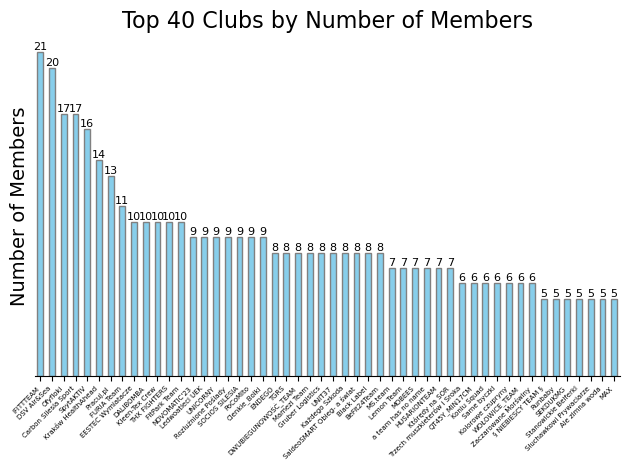

In [32]:
# Count number of club members
by_club = df[['Club', 'Number']].groupby(['Club']).count().sort_values(by='Number', ascending=False)

# Plot the 40 largest clubs
plt.figure(figsize=(20, 15))
ax = by_club.iloc[:50].plot(kind='bar', color='skyblue', edgecolor='gray', legend=None)

# Remove x-axis label
ax.set_xlabel('')

# Set y-axis label
ax.set_ylabel('Number of Members', fontsize=14)

# Set y-axis ticks to whole numbers
ax.set_yticks(range(0, int(by_club.iloc[:40]['Number'].max()) + 1, 50))

# Remove 0 from the y-axis
ax.set_ylim(bottom=0.00000001)

# Add title
plt.title('Top 40 Clubs by Number of Members', fontsize=16)

# Add data labels on each bar
for i, v in enumerate(by_club.iloc[:50]['Number']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=5)

# Remove grid lines
plt.grid(False)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

---

We've got the number of members per club but it doesn't answer my question of "the best" club. For this, let's compare the avg pace and time for each of them.

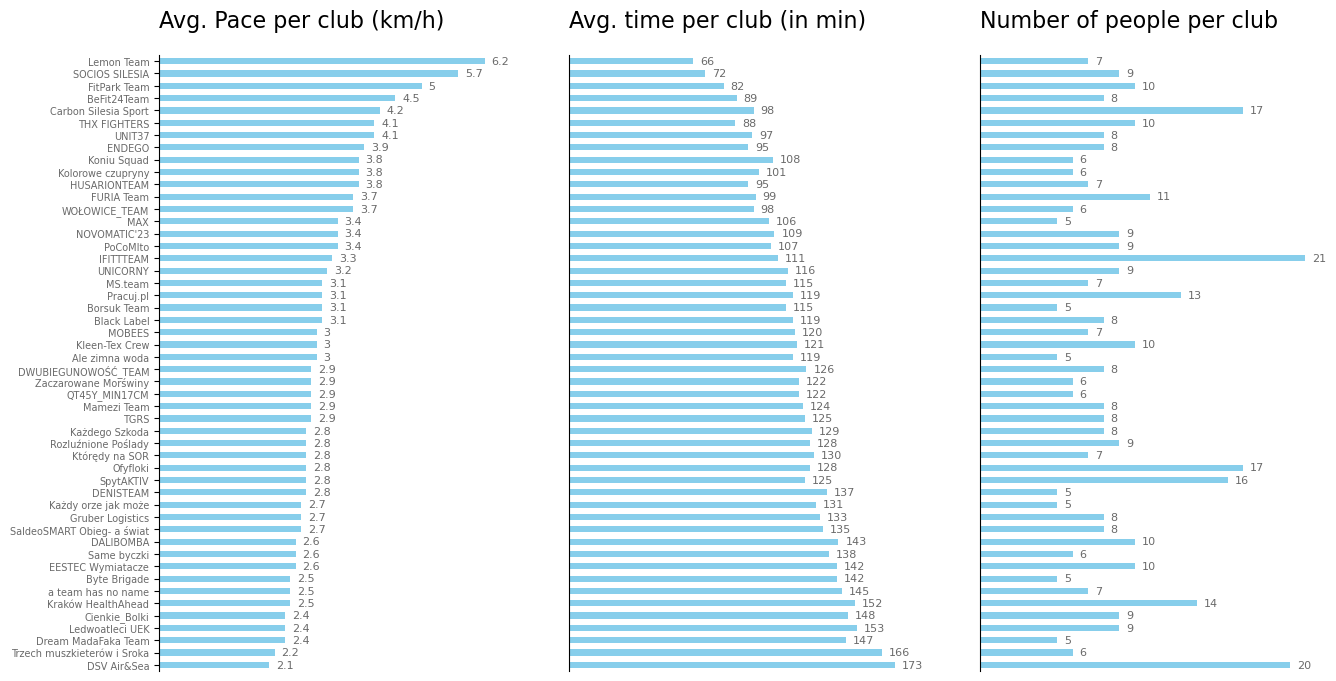

In [33]:
# Group by 'Club' and aggregate relevant statistics
best_club = df.groupby('Club').agg({'Pace km/h': lambda x: round(x.mean(), 1),
                                    'timeInSec': lambda x: round(x.mean() / 60, 0),
                                    'Number': 'count'
                                   }).nlargest(50, 'Number')

# Sort 'best_club' by 'Pace km/h' in ascending order
best_club.sort_values(by='Pace km/h', inplace=True)

# Create subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 8), sharey=True)

# Define plot titles
titles = ['Avg. Pace per club (km/h)', 'Avg. time per club (in min)', 'Number of people per club']

# Define data columns and labels
data_columns = ['Pace km/h', 'timeInSec', 'Number']
ylabel = best_club.index
y_pos = np.arange(len(best_club))

# Loop over subplots and plot the data
for i, (ax, column, title) in enumerate(zip(axs, data_columns, titles)):
    bars = ax.barh(y_pos, best_club[column], height=0.5, color='skyblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(ylabel, fontsize=7, color='dimgray')
    ax.invert_yaxis()
    ax.set_title(title, fontsize=16, pad=20, loc='left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.bar_label(bars, padding=5, fontsize=8, color='dimgray')
    
    # Set x-axis limits and ticks dynamically
    ax.set_xticks(np.arange(0, int(best_club[column].max()) + 1, 200))
    ax.set_xlim(left=0.0000001)
    ax.set_ylim(-0.5, len(best_club) - 0.5)
    
    # Apply tick_params only to the second and third charts
    if i != 0:
        ax.tick_params(axis='both', which='major', color='white')


# Show the plot
plt.show()

---

So even though IFITTEAM and DSV Air&Sea are the largest groups, they're far behind in terms of avg. speed.

It'd also be iteresting to see the Time Distribution graph to see what's the gap between fastest and slowest runners.

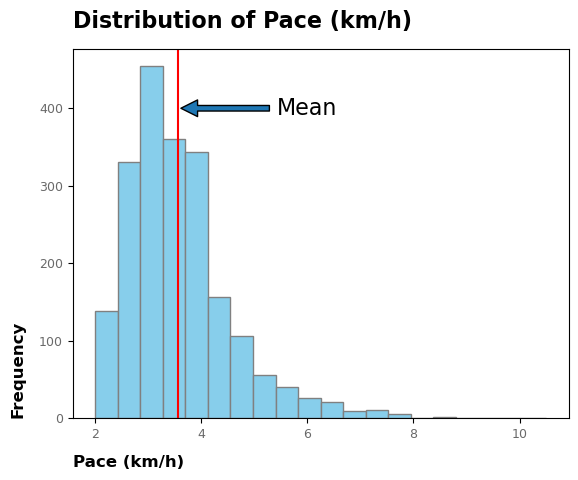

In [34]:
# Plot histogram of 'Pace (km/h)'
plt.hist(df['Pace km/h'], bins=20, color='skyblue', edgecolor='gray')
plt.xlabel('Pace (km/h)', loc='left', fontsize=12, weight='bold', labelpad=10)
plt.ylabel('Frequency', loc='bottom', fontsize=12, weight='bold', labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=9, labelcolor='dimgrey')
plt.title('Distribution of Pace (km/h)', fontsize=16, loc='left', weight='bold', pad=15)
plt.axvline(x=df['Pace km/h'].mean(), color='r')
plt.annotate('Mean', (df['Pace km/h'].mean()-0.05, 400),
            xytext=(df['Pace km/h'].mean()+3, 400),
            arrowprops=dict(shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='center')
plt.show()

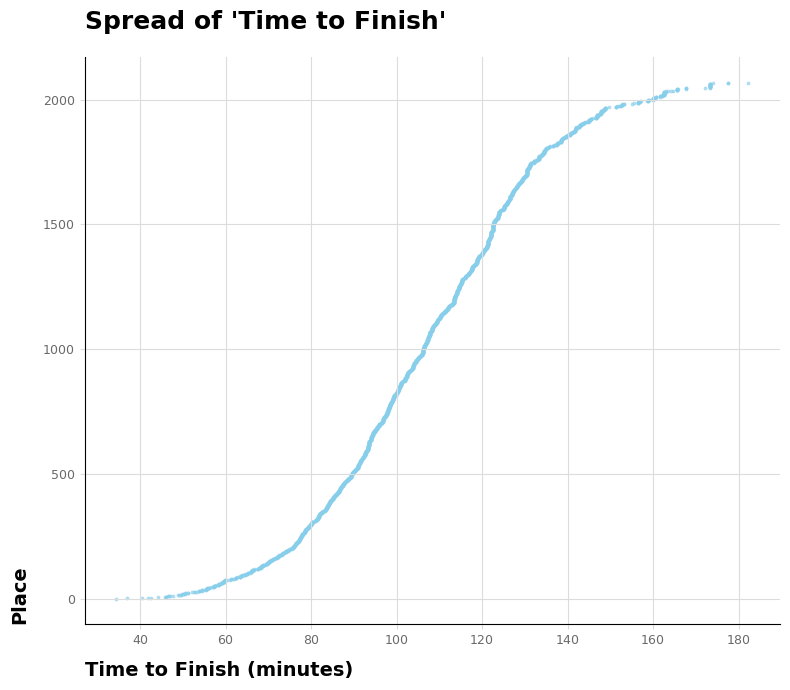

In [35]:
y = pd.to_numeric(df['Place'])
x = df['timeInSec'] / 60

fig, ax = plt.subplots(figsize=(8, 7))

# Scatter plot
ax.scatter(x, y, s=5, color='skyblue', alpha=0.6, linewidth=0.5)

# Set labels and title
ax.set_xlabel('Time to Finish (minutes)', fontsize=14, loc='left', weight='bold', labelpad=10)
ax.set_ylabel('Place', fontsize=14, loc='bottom', weight='bold', labelpad=10)
ax.set_title("Spread of 'Time to Finish'", fontsize=18, pad=20, loc='left', weight='bold')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines
ax.grid(True, color='gainsboro')

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=9, labelcolor='dimgrey', color='gainsboro')


plt.tight_layout()
plt.show()

---

Not much surprise - the scatter plot creates an 'S' shape line as expected. This means that there was a lot more difference between fastest runners and the middle of the group as well as between the middle and slowest runners.

Now, to get even more information about the spread, let's create a Histogram.

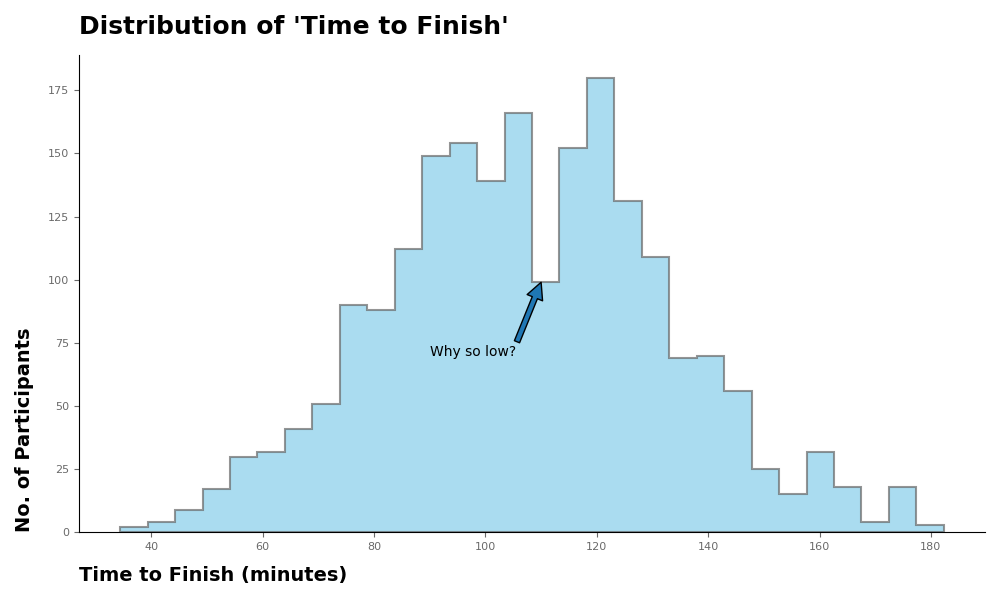

In [36]:
# change to widgets for interactivity
%matplotlib widget
from matplotlib.widgets import Cursor
import mplcursors # for hovering data

fig, ax = plt.subplots(figsize=(10,6))

# Plot histogram with 30 bins
ax.hist(df['timeInSec']/60, bins=30, histtype = 'stepfilled', color = 'skyblue', edgecolor='dimgray', linewidth=1.5, alpha=0.7)

# Set labels and title
ax.set_xlabel('Time to Finish (minutes)', loc='left', fontsize=14, weight='bold', labelpad=10)
ax.set_ylabel('No. of Participants', loc='bottom', fontsize=14, weight='bold', labelpad=10)
ax.set_title("Distribution of 'Time to Finish'", loc='left', fontsize=18, weight='bold', pad='15')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=8, labelcolor='dimgrey', color='dimgrey')

# add annotation in a dip
ax.annotate('Why so low?', xy=(110, 99), arrowprops={}, xytext=(90,70))

mplcursors.cursor(hover=True)
mplcursors.cursor(ax).connect(
    "add", lambda sel: sel.annotation.set(sel.artist.get_label()))


Cursor_widget = Cursor(ax, horizOn=False, useblit=True, color='black', linewidth=1)

fig.tight_layout()
plt.show()

---

Most people took between 100 and ~130 minutes to finish the race but there's an interesting dip in the middle which suggests that I'm working with bimodal distribution. This is not an unusual observation in running competitions and is usually caused by different times between male and female contestants. Let's test this hypothesis.

Distribution of time to finish the race by Sex of participants. Crude numbers on the left and density distribution on the right 




<Figure size 1000x600 with 0 Axes>

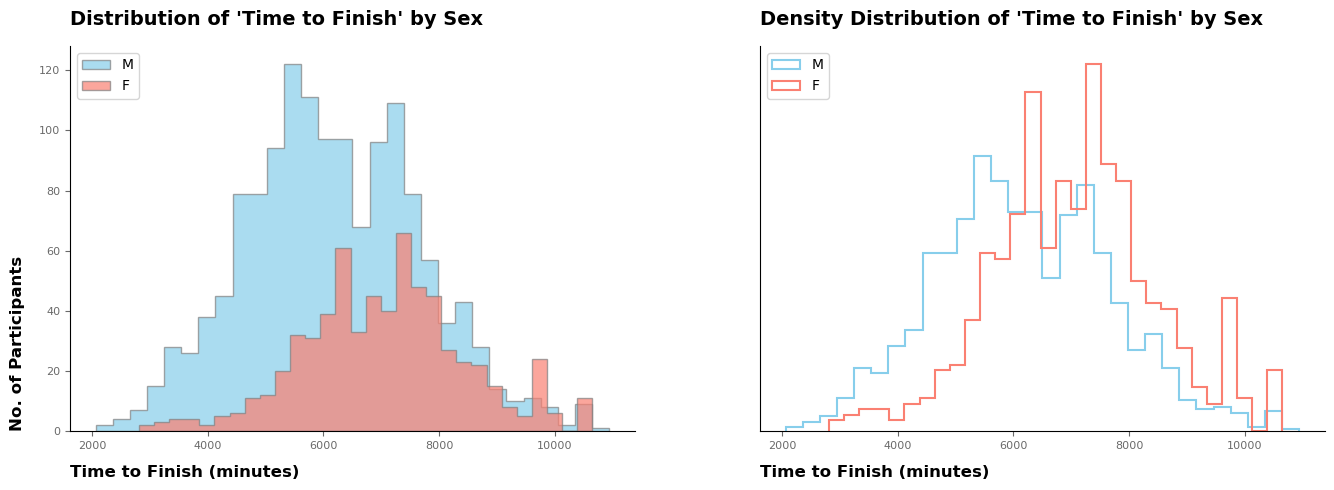

In [37]:
# Clear the memory from the above chart
plt.clf()

# Change 'widget' to 'inline'
%matplotlib inline

# split the data by Males and Females
M = df['timeInSec'].loc[df['Sex'] == 'M']
F = df['timeInSec'].loc[df['Sex'] == 'F']

n_bins = 30
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Plot histograms with 30 bins and split by Males and Females
axs[0].hist(M, bins=n_bins, histtype = 'stepfilled', color = 'skyblue', edgecolor='gray', label = 'M', alpha=0.7)
axs[0].hist(F, bins=n_bins, histtype = 'stepfilled', color = 'salmon', edgecolor='gray', label = 'F', alpha=0.7)
axs[0].legend(loc=2)
axs[0].set_xlabel('Time to Finish (minutes)', loc='left', fontsize=12, weight='bold', labelpad=10)
axs[0].set_ylabel('No. of Participants', loc='bottom', fontsize=12, weight='bold', labelpad=10)
axs[0].set_title("Distribution of 'Time to Finish' by Sex", loc='left', fontsize=14, weight='bold', pad='15')
axs[0].tick_params(axis='both', which='major', labelsize=8, labelcolor='dimgrey', color='dimgrey')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Plot Density Distribution histograms with 30 bins and split by Males and Females
axs[1].hist(M, bins=n_bins, density = True, histtype = 'step', color = 'skyblue', label = 'M', linewidth=1.5)
axs[1].hist(F, bins=n_bins, density = True, histtype = 'step', color = 'salmon', label = 'F', linewidth=1.5)
axs[1].legend(loc=2)
axs[1].set_xlabel('Time to Finish (minutes)', loc='left', fontsize=12, weight='bold', labelpad=10)
axs[1].set_yticks([])
axs[1].set_title("Density Distribution of 'Time to Finish' by Sex", loc='left', fontsize=14, weight='bold', pad='15')
axs[1].tick_params(axis='both', which='major', labelsize=8, labelcolor='dimgrey', color='dimgrey')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Add a comment above the charts to explain the difference between them
print('\033[1m' + 'Distribution of time to finish the race by Sex of participants. Crude numbers on the left and density distribution on the right', '\n\n')
plt.subplots_adjust(wspace=10)
fig.tight_layout()
plt.show()

---

Interesting! When we divide the data by Men and Women it still seems like both groups are distributed bimodially. It could be because of the nature of the Runmageddon competitions. Participants are often divided into competitive ones and those who came there just to have fun! By the shape of the histograms it apprears that Male runners came more often to compete than Females which doesn't surprise me either. :)

Let's see what else can we find out about the Sex differences.

In [38]:
# create a summary pivot table for Males and Females 
df[['Clock time 6km', 'Sex']].groupby('Sex').describe().T

Sex                                           F                          M
Clock time 6km count                        650                       1415
               mean   0 days 01:57:35.906923076  0 days 01:42:56.571378091
               std    0 days 00:23:23.812906653  0 days 00:25:12.544316098
               min       0 days 00:46:51.550000     0 days 00:34:24.900000
               25%       0 days 01:42:37.300000     0 days 01:25:01.175000
               50%       0 days 01:57:46.850000     0 days 01:40:56.350000
               75%       0 days 02:11:05.162500     0 days 02:01:19.075000
               max       0 days 02:57:27.850000     0 days 03:02:18.550000

---

- There's more than double the amount of Male participants compared to Females.
- Male participants finished earlier on average but have a slightly bigger Standard Deviation.
- Within both groups there's a big gap between fastest runners and 1st Quartiles. Same with the 3rd Quartiles and slowest runner. (That only further confirms my earlier 'Spread' analysis)

---

And how do they compare in terms of pace?

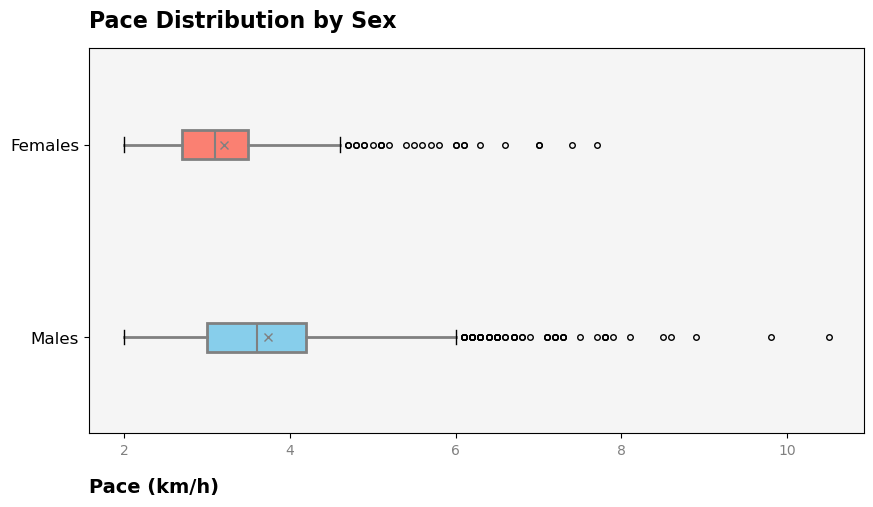

In [39]:
# Create the box plot with custom styling
fig, ax = plt.subplots(figsize=(10, 5))
M = df.loc[df['Sex'] == 'M', 'Pace km/h'].dropna()
F = df.loc[df['Sex'] == 'F', 'Pace km/h'].dropna()

# Customize the Mean, Median and fliers points
flierprops = dict(marker='o', markersize=4, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=1.5, color='gray')
meanpointprops = dict(marker='x', markeredgecolor='gray')

# Plot a boxplot
boxplot = ax.boxplot([M, F], patch_artist=True, showmeans=True, meanprops=meanpointprops, medianprops=medianprops, flierprops=flierprops, labels=['Males', 'Females'], vert=0)

# Customize boxes
colors = ['skyblue', 'salmon']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('gray')
    patch.set_linewidth(2)

# Customize whiskers
for whisker in boxplot['whiskers']:
    whisker.set_color('gray')
    whisker.set_linewidth(2)

# Set labels, title, ticks and background color
ax.set_facecolor('whitesmoke')
ax.set_xlabel('Pace (km/h)', fontsize=14, weight='bold', loc='left', labelpad=15)
ax.tick_params(axis='y', which='major', labelsize=12, labelcolor='black')
ax.tick_params(axis='x', which='major', labelsize=10, labelcolor='gray')
ax.set_title('Pace Distribution by Sex', fontsize=16, weight='bold', loc='left', pad=15)

# Show the plot
plt.show()

---

Even considering the nature of the Runmageddon, I don't know how so many people had a pace slower than an average person walking. :)

But let's not focus on these people (I'm sure they had great fun during the run). Instead, I'm interested in how well people on the top did. Let's say, the best 50 of them?

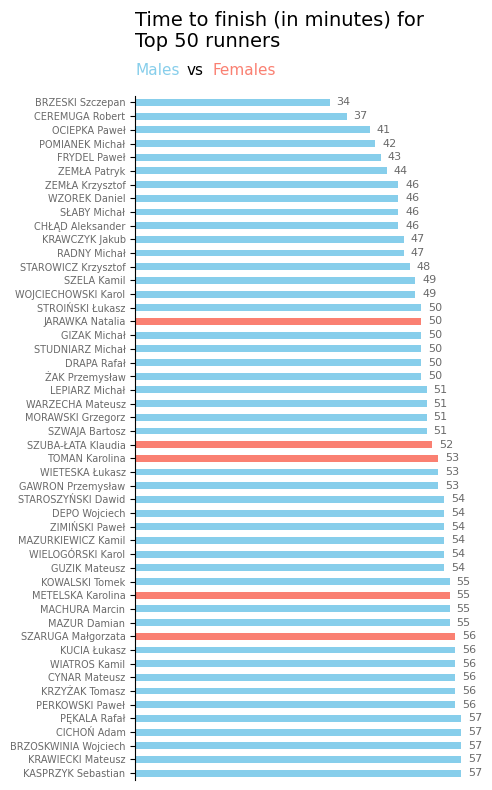

In [40]:
# Create the variables with relevant data
best_runner = df[['Participant', 'Sex', 'timeInSec']].sort_values(by='timeInSec', ascending=True)[:50]
time = round(best_runner['timeInSec']/60, 0).sort_values(ascending=False)
runner = best_runner['Participant']
y_pos = np.arange(len(runner))
colors = {'M': 'skyblue', 'F': 'salmon'}

fig, ax = plt.subplots(figsize=(5, 8))

# Plot the vertical bar chart for top 50 runners, color code based on Sex
bars = ax.barh(y_pos, time, height=0.5, color=best_runner['Sex'].map(colors))
ax.set_yticks(y_pos)
ax.set_yticklabels(runner, fontsize=7, color='dimgray')
ax.invert_yaxis()
ax.set_title('Time to finish (in minutes) for \nTop 50 runners', fontsize=14, pad=35, loc='left')
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.bar_label(bars, padding=5, fontsize=8, color='dimgray')
ax.set_xticks(np.arange(0, int(time.max()) + 1, 200))
ax.set_xlim(left=0.0000001)
ax.set_ylim(-0.5, len(time) - 0.5)

# Add legend in a form of text on top
ax.text(0, 51,'Males', color='skyblue', fontsize=11)
ax.text(9, 51,'vs', color='black', fontsize=11)
ax.text(13.5, 51,'Females', color='salmon', fontsize=11)

# Show the plot
plt.tight_layout()
plt.show()

---

Only 5 out of top 50 (10%) runners were Females although it's important to remember that there was generally less Women than Men competing in the race (~30%).

But, let's face it, it's not a fair comparison. I wonder how these people did among each categories.

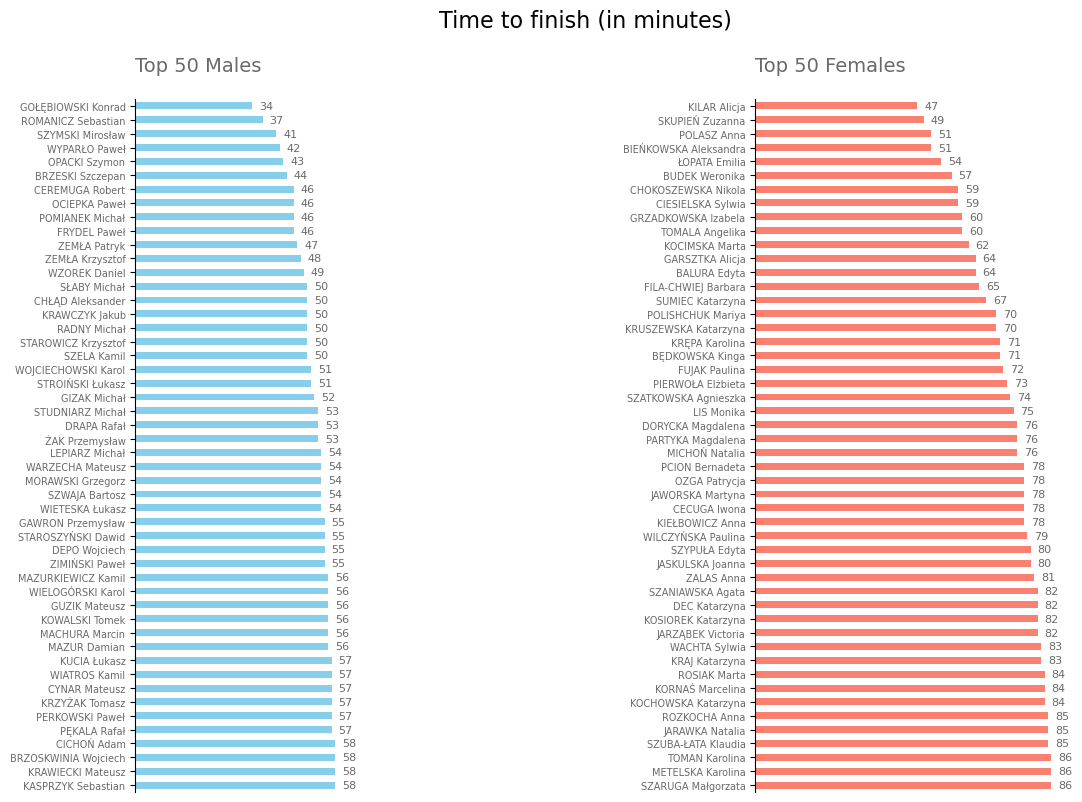

In [41]:
# Create the variables with relevant data
best_runner = df[['Participant', 'Sex', 'timeInSec']].sort_values(by='timeInSec', ascending=True)
best_runner['timeInSec'] = best_runner['timeInSec']/60
m = best_runner[best_runner['Sex'] == 'M'][:50]
f = best_runner[best_runner['Sex'] == 'F'][:50]
time_m = round(m['timeInSec'], 0).sort_values(ascending=False)
time_f = round(f['timeInSec'], 0).sort_values(ascending=False)
runner_m = m['Participant']
runner_f = f['Participant']
y_pos_m = np.arange(len(runner_m))
y_pos_f = np.arange(len(runner_f))


fig, axs = plt.subplots(ncols=2, figsize=(12, 9))

# Plot the vertical bar chart for the top 50 Males
bars = axs[0].barh(y_pos_m, time_m, height=0.5, color='skyblue')
axs[0].set_yticks(y_pos_m)
axs[0].set_yticklabels(runner_m, fontsize=7, color='dimgray')
axs[0].invert_yaxis()
axs[0].set_title('Top 50 Males', fontsize=14, pad=20, loc='left', color='dimgray')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].bar_label(bars, padding=5, fontsize=8, color='dimgray')
axs[0].set_xticks(np.arange(0, int(time.max()) + 1, 200))
axs[0].set_xlim(left=0.0000001, right=90)
axs[0].set_ylim(-0.5, len(time_m) - 0.5)

# Plot the vertical bar chart for the top 50 Females
bars = axs[1].barh(y_pos_f, time_f, height=0.5, color='salmon')
axs[1].set_yticks(y_pos_f)
axs[1].set_yticklabels(runner_f, fontsize=7, color='dimgray')
axs[1].invert_yaxis()
axs[1].set_title('Top 50 Females', fontsize=14, pad=20, loc='left', color='dimgray')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].bar_label(bars, padding=5, fontsize=8, color='dimgray')
axs[1].set_xticks(np.arange(0, int(time.max()) + 1, 200))
axs[1].set_xlim(left=0.0000001, right=90)
axs[1].set_ylim(-0.5, len(time_f) - 0.5)


# Add a main title to the chart
fig.suptitle('Time to finish (in minutes)', fontsize=16, horizontalalignment='center')

# show the plot
plt.subplots_adjust(wspace=1)
plt.show()

---

No doubt, the gap is big. Even the last Male runner of top 50 would score better than 44 Females from top 50.

Now, let's check the 'Category' column to see how well people performed in each of them.

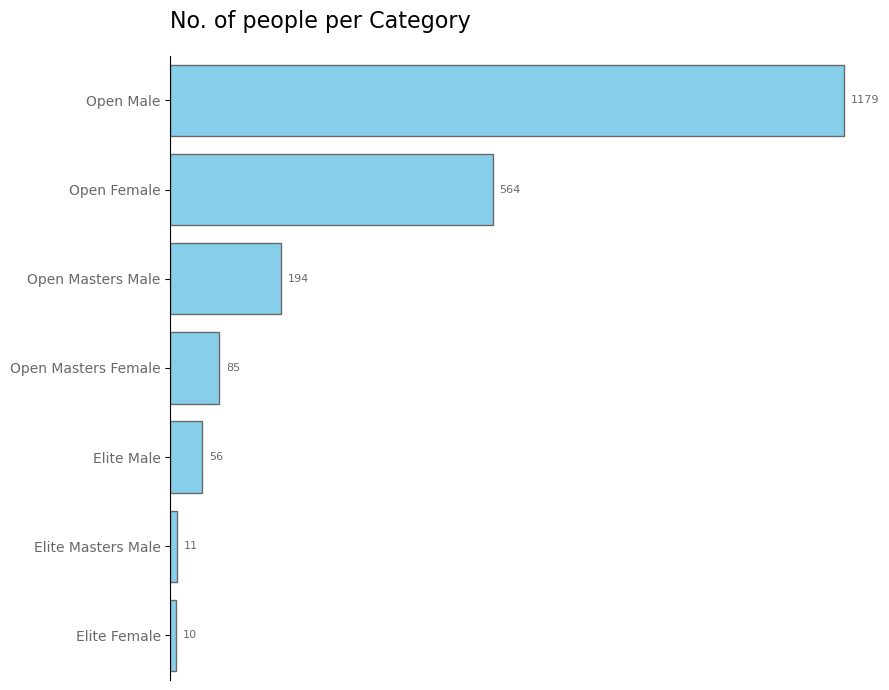

In [42]:
by_cat = df[['Category', 'Number']].groupby(['Category']).count().sort_values(by='Number', ascending=True)
# by_cat.plot(kind='barh', figsize=(5,5), legend=None)

fig, ax = plt.subplots(figsize=(9, 7))

bars = ax.barh(by_cat.index, by_cat['Number'], color='skyblue', edgecolor='dimgray')
ax.set_title('No. of people per Category', fontsize=16, pad=20, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.bar_label(bars, padding=5, fontsize=8, color='dimgray')
ax.set_yticks(by_cat.index)
ax.set_yticklabels(by_cat.index, fontsize=10, color='dimgray')
ax.set_xticks(np.arange(0, int(by_cat['Number'].max()) + 1, 2000))
ax.set_xlim(left=0.000001)
ax.set_ylim(-0.5, len(by_cat) - 0.5)

plt.tight_layout()
plt.show()

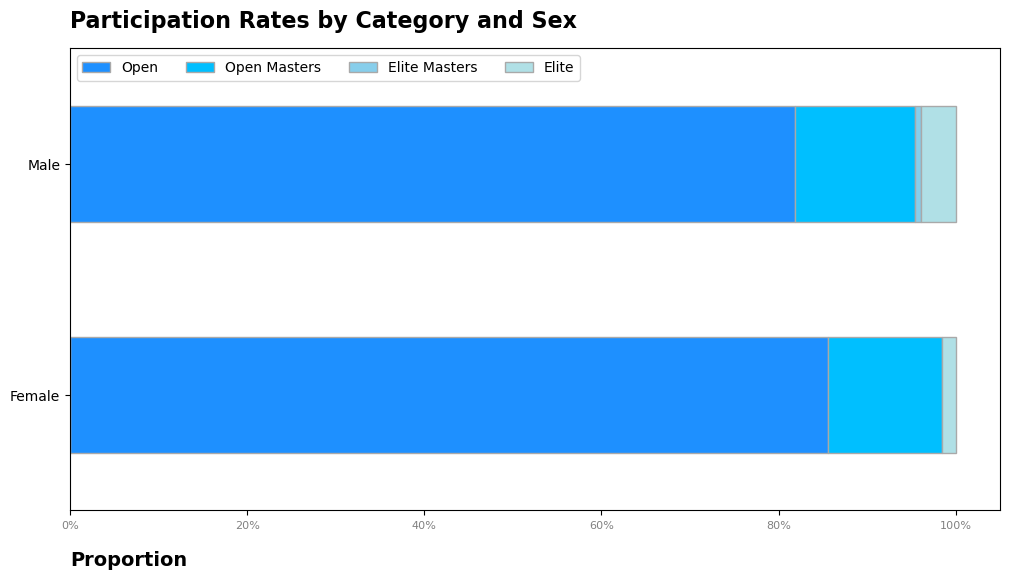

In [43]:
# Define a function to calculate the participation rates for different categories based on Sex
def rate_of_participants(df, categories):
    cat_rate = {}
    for category in categories:
        if 'Male' in category:
            sex = 'M'
        else:
            sex = 'F'
        rate = round((df['Category'] == category).sum() / (df['Sex'] == sex).sum() * 100, 2)
        cat_rate[category] = rate
    return cat_rate

# Get unique categories from the DataFrame
unique_categories = df['Category'].unique()

# Calculate participation rates for each category
result = rate_of_participants(df, unique_categories)

# Create a DataFrame from the result dictionary
df_result = pd.DataFrame.from_dict(result, orient='index', columns=['Rate'])
df_result.index.names = ['Category']
df_result.reset_index(inplace=True)

# Split the 'Category' column into 'Category' and 'Sex' columns
df_result[['Category', 'Sex']] = df_result['Category'].str.rsplit(' ', n=1, expand=True)

# Pivot the DataFrame to prepare for plotting
pivot = df_result.pivot(index='Sex', columns='Category', values='Rate')

# Reorder columns in the pivot table
pivot = pivot.reindex(columns=['Open', 'Open Masters', 'Elite Masters', 'Elite'])

# Define x-tick values for the plot
xticks = [*range(0, 101, 20)]

# Import library for color mapping
from matplotlib.colors import ListedColormap

# Define a colormap for the plot
cmap = ListedColormap(['dodgerblue', 'deepskyblue', 'skyblue', 'powderblue'])

# Create a horizontal stacked bar plot with matplotlib backend
stack = pivot.plot(kind='barh',
                   stacked=True,
                   figsize=(12, 6),
                   cmap=cmap,
                   edgecolor='darkgray',
                   backend='matplotlib')

# Add legend and adjust ticks and labels
plt.legend(loc="upper left", ncol=4)
plt.xlabel("Proportion", fontsize=14, loc='left', labelpad=15, weight='bold')
plt.ylabel(None)
plt.xticks(xticks, labels=[f'{xtick}%' for xtick in xticks], fontsize=8, color='gray')
plt.title('Participation Rates by Category and Sex', fontsize=16, loc='left', pad=15, weight='bold')
plt.show()

---

It looks like not all groups had participants (Elite Masters Female). Also, the vast majority of participants took part in the "Open" category which suggests that most people tend to treat Runmageddon as a fun activity and not necessarily a competition.

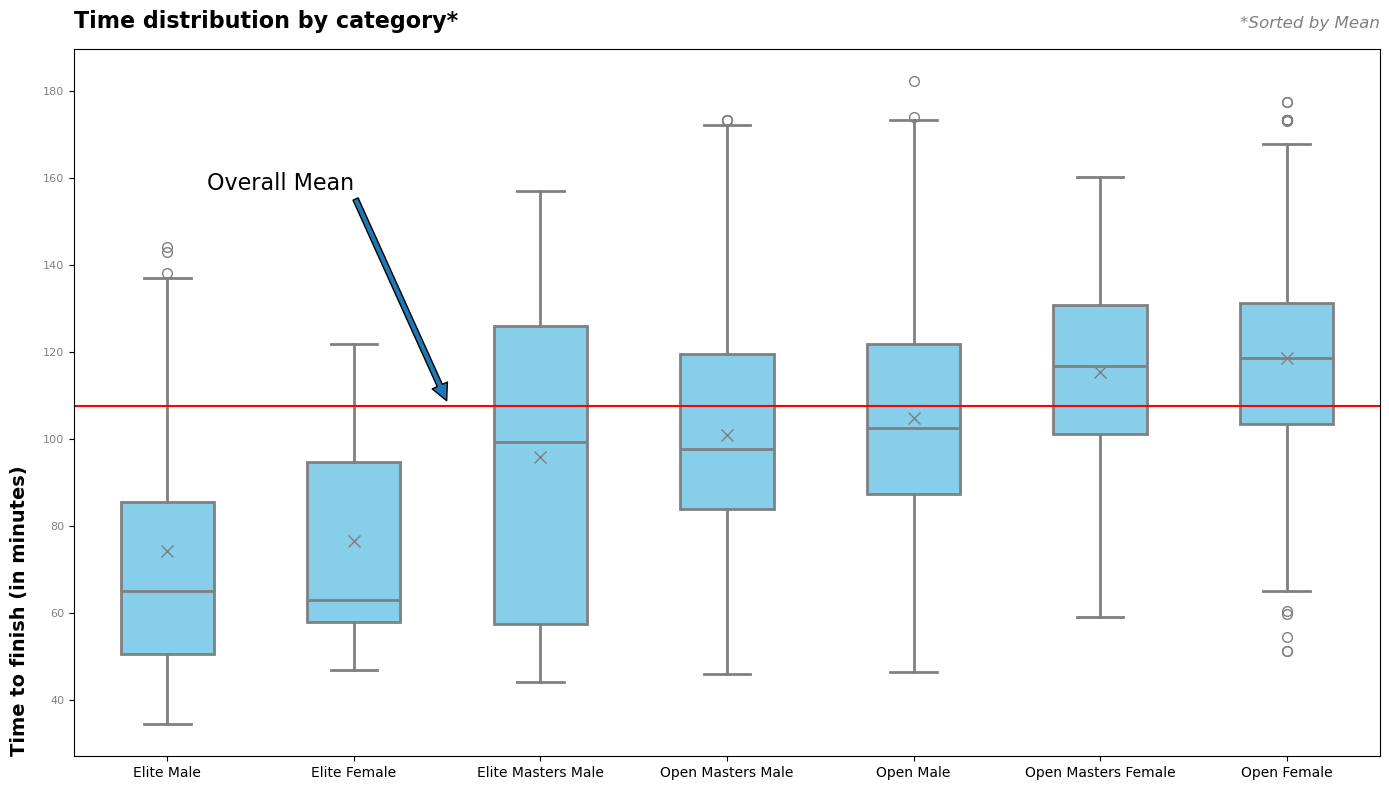

In [45]:
# For cycling through one color
import itertools

# Filter data for boxplot
box_df = df[['Category', 'timeInSec']].dropna()

# Sort dataframe columns by mean for clear boxplot
df2 = pd.DataFrame({col:vals['timeInSec']/60 for col, vals in box_df.groupby('Category')})
mean = df2.mean()
mean.sort_values(ascending=True, inplace=True)
df2 = df2[mean.index]

# Drop nans from dataframe and divide columns into items of a list
def mean_box_cleaner(x):
    data = []
    for col in x.columns:
        columns = x[col].dropna()
        data.append(columns)
    return data

# Create subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Customize and format the Mean, Median and fliers points
flierprops = dict(marker='o', markersize=7, markeredgecolor='gray')
medianprops = dict(linestyle='-', linewidth=2, color='gray')
meanpointprops = dict(marker='x', markersize=8, markeredgecolor='gray')
boxprops = dict(linewidth=2, color='gray')
whiskerprops = dict(linewidth=2, color='gray')
capprops = dict(linewidth=2, color='gray')

# Plot mean boxplots
bp = ax.boxplot(
                mean_box_cleaner(df2),
                showmeans=True, 
                patch_artist=True, 
                meanprops=meanpointprops, 
                medianprops=medianprops, 
                flierprops=flierprops, 
                boxprops=boxprops, 
                whiskerprops=whiskerprops, 
                capprops=capprops, 
                labels=df2.columns.tolist()
               )

# Customize boxes
colors = ['skyblue']
for patch, color in zip(bp['boxes'], itertools.cycle(colors)):
    patch.set_facecolor(color)

# For mean line and annotation
to_minutes = df['timeInSec']/60

# Customize the labels, titles, ticks and remove grids
ax.set_ylabel('Time to finish (in minutes)', fontsize=14, loc='bottom', weight='bold', labelpad=10)
ax.tick_params(axis='y', which='major', labelsize=8, labelcolor='gray')
ax.set_title('Time distribution by category*', fontsize=16, loc='left', weight='bold', pad=15)
ax.set_title('*Sorted by Mean', fontsize=12, loc='right', fontstyle='italic', color='gray', pad=15)
ax.grid(False)
ax.annotate('Overall Mean', (2.5, to_minutes.mean()+1),
            xytext=(2, to_minutes.mean()*1.5),
            arrowprops=dict(shrink=0.005),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')


plt.axhline(y=to_minutes.mean(), color='r')   
plt.tight_layout()
plt.show()

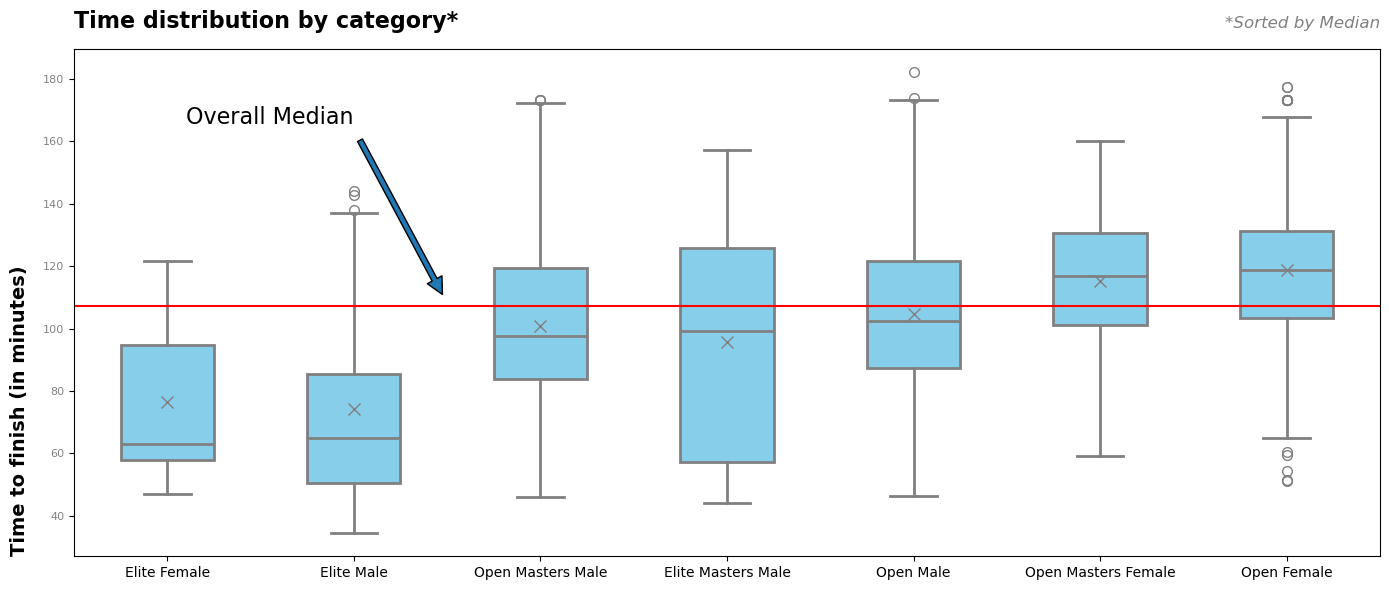

In [47]:
# For cycling through one color
import itertools

# Filter data for boxplot
box_df = df[['Category', 'timeInSec']].dropna()

# Sort dataframe columns by median for clear boxplot
df2 = pd.DataFrame({col:vals['timeInSec']/60 for col, vals in box_df.groupby('Category')})
median = df2.median()
median.sort_values(ascending=True, inplace=True)
df2 = df2[median.index]

# Drop nans from dataframe and divide columns into items of a list
def median_box_cleaner(x):
    data = []
    for col in x.columns:
        columns = x[col].dropna()
        data.append(columns)
    return data

# Create subplots
fig, ax = plt.subplots(figsize=(14, 6))

# Customize and format the Mean, Median and fliers points
flierprops = dict(marker='o', markersize=7, markeredgecolor='gray')
medianprops = dict(linestyle='-', linewidth=2, color='gray')
meanpointprops = dict(marker='x', markersize=8, markeredgecolor='gray')
boxprops = dict(linewidth=2, color='gray')
whiskerprops = dict(linewidth=2, color='gray')
capprops = dict(linewidth=2, color='gray')

# Plot median boxplot
bp = ax.boxplot(
                median_box_cleaner(df2),
                showmeans=True, 
                patch_artist=True, 
                meanprops=meanpointprops, 
                medianprops=medianprops, 
                flierprops=flierprops, 
                boxprops=boxprops, 
                whiskerprops=whiskerprops, 
                capprops=capprops, 
                labels=df2.columns.tolist()
               )

# Customize boxes
colors = ['skyblue']
for patch, color in zip(bp['boxes'], itertools.cycle(colors)):
    patch.set_facecolor(color)

# For median line and annotation
to_minutes = df['timeInSec']/60

# Customize the labels, titles, ticks and remove grids
ax.set_ylabel('Time to finish (in minutes)', fontsize=14, loc='bottom', weight='bold', labelpad=10)
ax.tick_params(axis='y', which='major', labelsize=8, labelcolor='gray')
ax.set_title('Time distribution by category*', fontsize=16, loc='left', weight='bold', pad=15)
ax.set_title('*Sorted by Median', fontsize=12, loc='right', fontstyle='italic', color='gray', pad=15)
ax.grid(False)
ax.annotate('Overall Median', (2.5, to_minutes.median()+1),
            xytext=(2, to_minutes.median()*1.6),
            arrowprops=dict(shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')


plt.axhline(y=to_minutes.median(), color='r')   
plt.tight_layout()
plt.show()

In [50]:
df.to_csv('runmageddon.csv')

---

That will conclude this part of the analysis. Next, I'll be looking into a wider range of Runmageddon Rekrut competitions. Stay tuned!